<a href="https://colab.research.google.com/github/adrj67/Regresion_Logistica_Regresion_Lineal/blob/miprim/Mi_3Tercer_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Logistica y Regresion Lineal

## Proyecto de machine Learning

In [ ]:
# importamos las librerias a usar. Para este caso Pandas
import pandas as pd

## Obtener los datos

In [ ]:
!git clone https://github.com/mnsosa/argentina_programa.git

Cloning into 'argentina_programa'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 7), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 39.43 KiB | 469.00 KiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
# leo el archivo csv con pandas
datos_cardiacos = pd.read_csv("/content/argentina_programa/datos/heart_failure_clinical_records_dataset.csv")
datos_cardiacos

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# Tipo de dato
type(datos_cardiacos)

pandas.core.frame.DataFrame

In [ ]:
# para ver una columna
datos_cardiacos['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [ ]:
# contar valores de una columna
datos_cardiacos['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [ ]:
datos_cardiacos['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [ ]:
# Resumen de la tabla para ver si hay algun dato nulo y tipos de datos
datos_cardiacos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Compara 2 columnas para ver por verdadero o falso si 2 columnas son iguales o no
datos_cardiacos['anaemia'] == datos_cardiacos['diabetes']
# se llama 'mascara', se refiere a una serie booleana

0       True
1       True
2       True
3      False
4       True
       ...  
294    False
295     True
296    False
297     True
298     True
Length: 299, dtype: bool

In [ ]:
# Las mascaras pueden usarse para filtrar filas de un dataframe
# sean 0 o 1 los valores que coinciden los muestra (los dos "1" o los dos "0")
mascara = datos_cardiacos['anaemia'] == datos_cardiacos['diabetes']

datos_cardiacos[mascara]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.00,1.4,139,1,0,258,0
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# Agarro la mascara y le pido que cuente solo la cantidad de valores de 'anemia'
datos_cardiacos[mascara]['anaemia'].value_counts()

0    98
1    53
Name: anaemia, dtype: int64

In [ ]:
# Cuantos tienen presion cardiaca alta?
datos_cardiacos[mascara]['high_blood_pressure'].value_counts()

0    103
1     48
Name: high_blood_pressure, dtype: int64

In [ ]:
# por edad
datos_cardiacos['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

## Regresion Logistica (Clasificacion)

### Tratamientos de datos
* En este caso vamos a predecir si murio o no la persona en base a los datos
* Salida: si murio
  Entrada: datos de la salud de la persona

In [ ]:
# muestra el encabezado de las columnas y las primeras 3 filas
datos_cardiacos.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [ ]:
# No estoy seguro que es 'time' asi que la voy a sacar
datos_cardiacos = datos_cardiacos.drop('time', axis=1) # asi borro columnas axis=1
# para borrar filas datos_cardiacos = datos_cardiacos.drop(2, axis=0) (nombre de la fila, axis=0 corresponde a filas)
datos_cardiacos.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [ ]:
# revisamos las variables categoricas ( las que son "si-no", "soltero-casado-divorsiado", etc)
datos_cardiacos['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
datos_cardiacos['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [ ]:
datos_cardiacos['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [ ]:
datos_cardiacos['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [ ]:
datos_cardiacos['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [ ]:
datos_cardiacos['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [ ]:
# inspeccionamos la variable 'ejection_fraction,minimos y maximos
datos_cardiacos['ejection_fraction'].min(), datos_cardiacos['ejection_fraction'].max()


(14, 80)

### Escalado de variables
* a todas las columnas numericas las vamos a trabajar para que esten todas en las misma escala, en este caso de 0 a 1

In [ ]:
# Antes de hacer el ESCALAMIENTO preparo los datos que voy a escalar.
# creo una variable con las columnas que no sean "categoricas"
variables_numericas = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium"
]
datos_cardiacos[variables_numericas]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


### Entrenamiento de modelos de regresion logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Separo en mis datos en conjunto de train(entrenamiento) y test(prueba)
y = datos_cardiacos['DEATH_EVENT'] # Dato de SALIDA
X = datos_cardiacos.drop("DEATH_EVENT", axis=1) # Datos de ENTRADA, todos menos 'DEATH_EVENT'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

6      1
183    1
185    1
146    0
30     1
      ..
188    0
71     0
106    0
270    0
102    0
Name: DEATH_EVENT, Length: 239, dtype: int64

In [ ]:
# como ver los datos de la fila 6
datos_cardiacos.loc[6]
# .iloc[100] devuelve el indice numero 100

age                             75.0
anaemia                          1.0
creatinine_phosphokinase       246.0
diabetes                         0.0
ejection_fraction               15.0
high_blood_pressure              0.0
platelets                   127000.0
serum_creatinine                 1.2
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                            10.0
DEATH_EVENT                      1.0
Name: 6, dtype: float64

In [ ]:
# uso el escalador de minmax
# Solo en los datos de entrenamiento
scaler = MinMaxScaler()

# se buscan los maximos y minimos del conjunto de entrenamiento y con eso
# se transfirman los datos
X_train_scaled = scaler.fit_transform(X_train)

# aplicamos la transformacion a la prueba, aca no se ajustan
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.63636364, 1.        , 0.02845114, ..., 1.        , 0.        ,
        0.02135231],
       [0.63636364, 0.        , 0.00969635, ..., 1.        , 0.        ,
        0.56227758],
       [0.37576364, 1.        , 0.01033427, ..., 1.        , 0.        ,
        0.59430605],
       ...,
       [0.27272727, 0.        , 0.09249809, ..., 1.        , 0.        ,
        0.29893238],
       [0.07272727, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.85409253],
       [0.72727273, 0.        , 0.11163562, ..., 1.        , 1.        ,
        0.29537367]])

In [ ]:
# Creo al modelo logistico
modelo_logistico = LogisticRegression()

# Entreno al modelo
modelo_logistico.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# hago pruebas con el test escalado
y_pred = modelo_logistico.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
# veo el test
y_test.values

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
# aca veo que % de aciertos tuvo entre y_pred (prediccion) y y_test (prueba)
accuracy_score(y_test, y_pred)

0.7166666666666667

## Regresion Lineal (Regresion)
* Buscamos predecir una variable numerica como puede ser la edad
* Entonces la SALIDA del modelo es la edad y la ENTRADA seran todo el resto

In [ ]:
datos_cardiacos

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<Axes: ylabel='Frequency'>

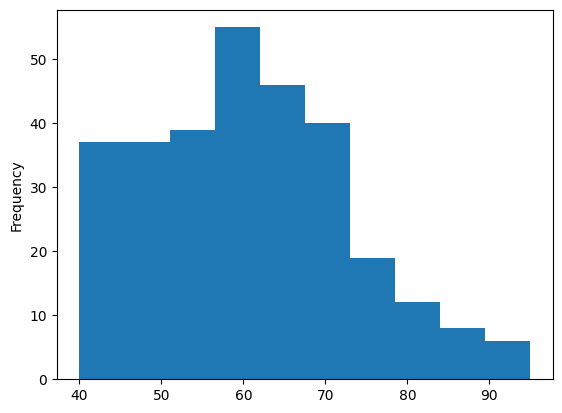

In [ ]:
# Fisualizar en un grafico las edades, histograma
datos_cardiacos['age'].plot(kind="hist")

<Axes: >

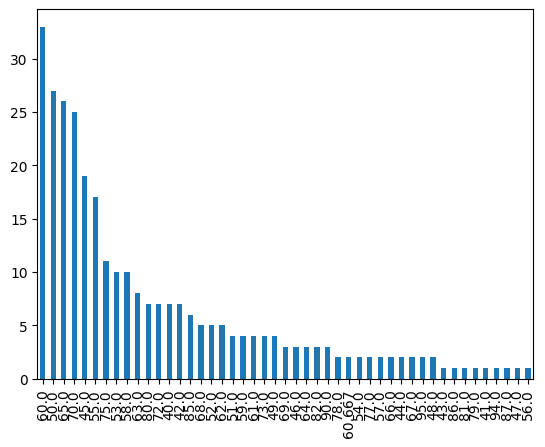

In [ ]:
# agrupo las edades y hago un grafico de barras
datos_cardiacos['age'].value_counts().plot(kind="bar")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# separo variable objetivo de entrada al modelo
X = datos_cardiacos.drop('age', axis=1)
y = datos_cardiacos['age']

# divido en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# escalo
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_lineal = LinearRegression()

modelo_lineal.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
modelo_lineal.predict(X_test_scaled)

array([56.95570269, 58.63030889, 63.3216734 , 71.45853509, 59.46648355,
       53.53504056, 68.21350092, 59.87254727, 70.05856316, 59.43429531,
       62.34489505, 67.95075376, 65.05098148, 59.39583798, 61.03665056,
       60.95572585, 62.63937915, 60.14080611, 68.32031954, 68.08892652,
       57.89476526, 60.66287454, 58.91873747, 68.22492641, 65.68983298,
       57.67710645, 55.38219213, 60.27853129, 62.93442363, 60.8797424 ,
       67.15416489, 59.97694073, 57.58967607, 64.00991965, 65.47137469,
       70.15788752, 69.41628592, 65.14365142, 59.86953179, 61.09980143,
       65.69120021, 63.35594694, 59.62416577, 60.35603737, 59.15824563,
       56.55908904, 55.21968099, 52.8497952 , 55.093772  , 61.12032791,
       66.39817583, 65.10311992, 63.2763731 , 57.42727351, 55.32522547,
       58.59361833, 57.6220071 , 64.38918767, 55.29126961, 63.44604171])

In [ ]:
y_test.values

array([70., 50., 45., 80., 42., 50., 60., 45., 90., 50., 70., 77., 58.,
       65., 60., 45., 64., 63., 45., 80., 60., 60., 64., 51., 70., 45.,
       70., 60., 48., 75., 45., 55., 50., 75., 50., 60., 70., 45., 55.,
       42., 60., 60., 65., 70., 53., 65., 70., 65., 55., 63., 72., 50.,
       59., 40., 70., 65., 54., 80., 49., 72.])

In [ ]:
y_pred = modelo_lineal.predict(X_test_scaled)

# error cuadratico medio
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Error cuadratico medio (MSE): ", mse)
print("Coeficiente de determinacion (R-squared): ", r2)

Error cuadratico medio (MSE):  129.08268181553157
Coeficiente de determinacion (R-squared):  0.011584419803477797
